In [ ]:
!pip install diffusers==0.24.0 transformers==4.36.2 torch==2.1.2 torchvision==0.16.2 accelerate==0.25.0 \
    opencv-python==4.8.1.78 matplotlib==3.8.2 tqdm==4.66.1 einops==0.7.0 huggingface_hub==0.19.4 opencv-python xformers requests pillow

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
from skimage.metrics import structural_similarity as ssim

# Import your original utilities
# from cubediff_utils_v2 import * 
from cubediff_utils_v1 import * 
from cubediff_utils import * 

import importlib
import cubediff_utils as cu
importlib.reload(cu)         # guarantees the notebook sees the new code
# import cubediff_utils_v2 as cu_v2
# importlib.reload(cu_v2)         # guarantees the notebook sees the new code

<module 'cubediff_utils' from '/home/jupyter/mluser/git/llm-cv-pano-cubediff/cubediff_utils.py'>

Successfully loaded image: (2571, 7227, 3)


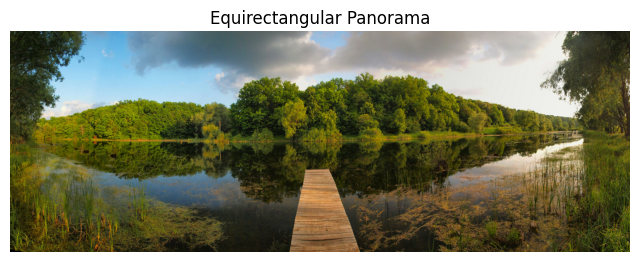

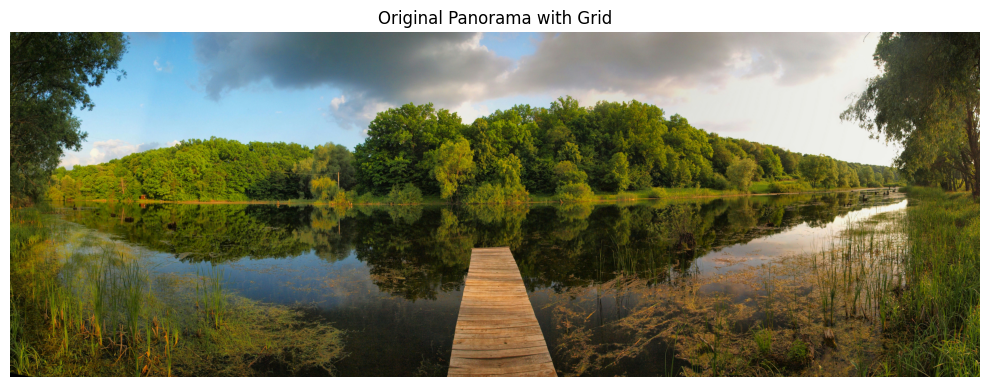

In [2]:
# Download a sample panorama image
# Sample URL - Use your own panorama image URL here
sample_url = None # "https://images.pexels.com/photos/1076885/pexels-photo-1076885.jpeg"

# Load the equirectangular panorama from URL
equirect_img = load_image_from_url(sample_url) if sample_url else None
local_file_path = "./panoramas/lake.jpg" # https://unsplash.com/photos/brown-wooden-dock-on-lake-surrounded-by-green-trees-during-daytime-GNNoZa8zVwY

# If URL loading fails, try loading local file
if equirect_img is None:
    equirect_img = load_local_image(local_file_path)

# If both methods fail, create a test image
if equirect_img is None:
    print("Creating a test image since loading failed")
    # Create a simple test image with a gradient pattern
    height, width = 512, 1024  # Standard equirectangular ratio is 1:2
    equirect_img = np.zeros((height, width, 3), dtype=np.uint8)
    
    # Create a simple pattern for testing
    for y in range(height):
        for x in range(width):
            # Horizontal gradient for R channel
            r = int(255 * x / width)
            # Vertical gradient for G channel
            g = int(255 * y / height)
            # Diagonal gradient for B channel
            b = int(255 * (x + y) / (width + height))
            equirect_img[y, x] = [r, g, b]
    
    print(f"Created test image: {equirect_img.shape}")

# Display the equirectangular panorama
plt.figure(figsize=(8, 4))
plt.imshow(equirect_img)
plt.title('Equirectangular Panorama')
plt.axis('off')
plt.show()

# Display with grid lines (optional)
visualize_equirectangular(equirect_img, "Original Panorama with Grid")

Loading image from ./panoramas/lake.jpg...
Successfully loaded image: (2571, 7227, 3)
Loaded image with shape (2571, 7227, 3)

Testing benchmark conversion method...
Benchmark method completed in 15.11 seconds

Benchmark Method Metrics:
MSE: 149.40
PSNR: 26.39 dB
SSIM: 0.7225
Seam Difference: 13.23
North Pole Difference: 5.17
South Pole Difference: 13.28
Equator Difference: 6.39
Longitude Differences: {'Front': '5.38', 'Right': '7.88', 'Back': '5.94', 'Left': '9.21'}
Diagnoses: ['Severe seam issue at longitude ±π (back face center). Apply specialized seam handling.', 'Pole distortion detected. Improve sampling near poles (top/bottom faces).', 'Uneven quality across longitude bands. Left face needs improvement.']

Testing super-high-quality conversion method...
Super-high-quality method completed in 25.33 seconds

Super-High-Quality Method Metrics:
MSE: 153.72
PSNR: 26.26 dB
SSIM: 0.7186
Seam Difference: 14.78
North Pole Difference: 5.15
South Pole Difference: 13.37
Equator Difference: 

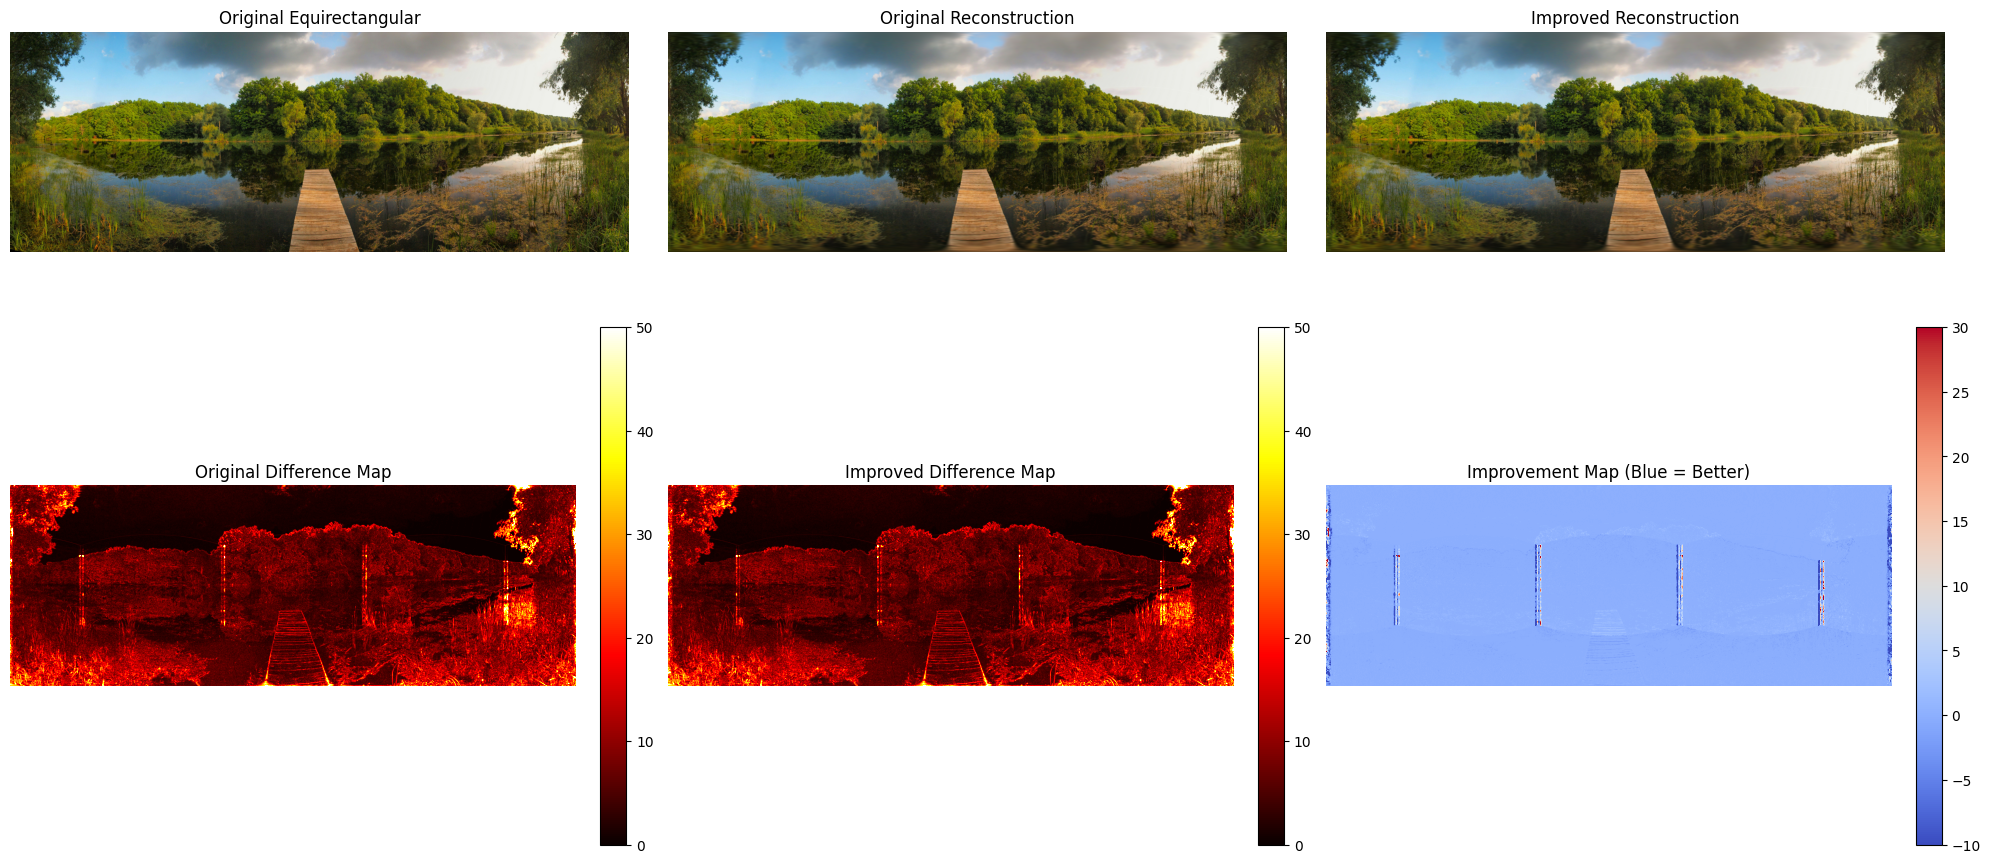

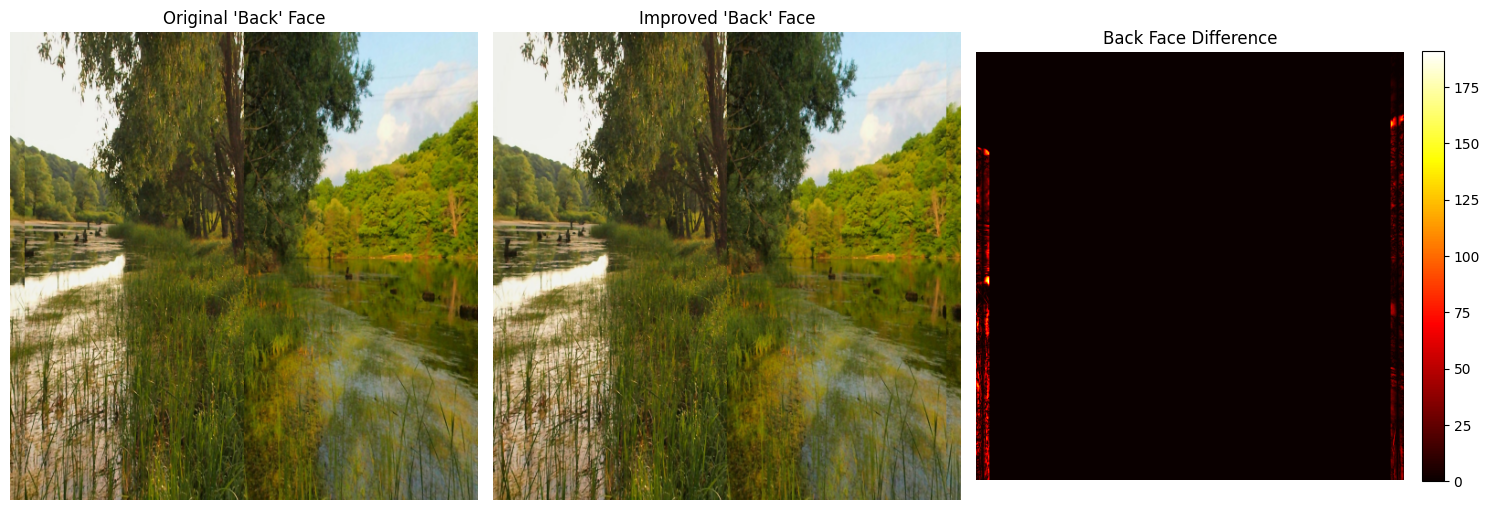

KeyError: 'original_cubemap'

In [3]:

results = test_conversion(local_file_path)

# Compare face by face
compare_face_by_face(results['original_cubemap'], results['improved_cubemap'])